In [3]:
# -*- coding: utf-8 -*-

import pandas as pd

# read_csv 함수로 데이터를 Dataframe형태로 로딩!
file_path = '../data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')

In [2]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
print(chipo.shape)
print('=====================')
print(chipo.info())


(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [4]:
chipo.describe()
# 여기서 알수 있는 것은 item_price 열이 문자이므로 집계 함수로 처리하기 불가능함

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### chipotle 데이터셋의 수치적 특징 파악
describe 함수로 요약 통계량 출력하기 

In [5]:
chipo['order_id'] = chipo['order_id'].astype(int) # order_id는 숫자의 의미를 가지고 있지 않기 때문에 str으로 변환함.(집계함수로 처리할 필요X)
print(chipo.describe()) # 조작하고자 하는 dataframe에서 수치형 피처들의 요약 통계량을 확인

          order_id     quantity
count  4622.000000  4622.000000
mean    927.254868     1.075725
std     528.890796     0.410186
min       1.000000     1.000000
25%     477.250000     1.000000
50%     926.000000     1.000000
75%    1393.000000     1.000000
max    1834.000000    15.000000


In [6]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int32 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int32(1), int64(1), object(3)
memory usage: 162.6+ KB


## unique 함수로 범주형 피처의 개수 출력하기

#### 활용 함수, unique(), len()

In [7]:
chipo['order_id'].unique() # 중복되지 않는 값들만 모두 배열로 보여줌. ndarray

array([   1,    2,    3, ..., 1832, 1833, 1834])

In [8]:
print(len(chipo['order_id'].unique())) # len()를 다시 입혀서 총 개수를 확인 할 수 있음

1834


In [9]:
chipo['item_name'].unique() # 중복되지 않는 값들만 모두 배열로 보여줌. ndarray

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [10]:
print(len(chipo['item_name'].unique())) # len()를 다시 입혀서 총 개수를 확인 할 수 있음. 도출 할 수 있는 정보-> 이곳 메뉴는 총 50개

50


In [11]:
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [12]:
# 만약 10개만 보여주고싶다면 [:] 슬라이싱 기능을 활용하면 되요. 아래의 경우 decending으로 sorting되어서 10개의 row를 보여주게되요.
chipo['item_name'].value_counts()[0:10]

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [13]:
# 아래 함수와 동일한 결과가 나오게 되요.
# print(len(chipo['item_name'].unique())) 
len(chipo['item_name'].value_counts())

50

### 피처 형태의 종류

|구분|명칭|특징|예시|
|---|---|---|---|
수치형피처|연속형 피처|어떤 구간 안의 모든 값을 데이터로써 가질 수 있다. |키, 몸무게|
||비연속형 피처|셀수 있으며, 일정 구간 안에서 정해진 몇 개의 값을 가져야 한다.|나이|
|범주형 피처|순서 있는 범주형 피처|순서가 있으나 수치는 아님| 학점|
||순서 없는 범주형 피처| 데이터가 구분되면서도 순서가 없다|혈액형|

# <Step2. 인사이트의 발견> : 탐색과 시각화

다음으로, 인사이트를 발견할 수 있을만한 개념적 질문들을 정의합니다.
- 가장 많이 주문한 item은 무엇인지
- item당 주문의 총량은 얼마인지

### [가장 많이 주문한 item]

In [14]:
# 가장 많이 주문한 item: 10개를 출렵할게요. 
item_count = chipo['item_name'].value_counts()[0:10]
item_count

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [15]:
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print('Top', idx, ':', val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


In [16]:
# enmuerate(some_dict.iteritems()) 이 반환 하는 값은 기본적으로 index, key, value 순서임. start 인자는 생략 가능함
for idx, (key, val) in enumerate(item_count.iteritems(), start=100):
    print('Top', idx, ':', key, val)

Top 100 : Chicken Bowl 726
Top 101 : Chicken Burrito 553
Top 102 : Chips and Guacamole 479
Top 103 : Steak Burrito 368
Top 104 : Canned Soft Drink 301
Top 105 : Steak Bowl 211
Top 106 : Chips 211
Top 107 : Bottled Water 162
Top 108 : Chicken Soft Tacos 115
Top 109 : Chicken Salad Bowl 110


In [17]:
# item당 주문 개수를 출력합니다. 각 아이템에 몇개의 주문이 이루어졌는지 확인 할 수 있음
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [18]:
# item당 주문 총량을 출력합니다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [19]:
# !pip install matplotlib
!python -m pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\osori\desktop\project\tda_hanbit\env\lib\site-packages (20.2.3)


In [20]:
!pip install numpy

In [21]:
item_quantity.index.tolist()

['6 Pack Soft Drink',
 'Barbacoa Bowl',
 'Barbacoa Burrito',
 'Barbacoa Crispy Tacos',
 'Barbacoa Salad Bowl',
 'Barbacoa Soft Tacos',
 'Bottled Water',
 'Bowl',
 'Burrito',
 'Canned Soda',
 'Canned Soft Drink',
 'Carnitas Bowl',
 'Carnitas Burrito',
 'Carnitas Crispy Tacos',
 'Carnitas Salad',
 'Carnitas Salad Bowl',
 'Carnitas Soft Tacos',
 'Chicken Bowl',
 'Chicken Burrito',
 'Chicken Crispy Tacos',
 'Chicken Salad',
 'Chicken Salad Bowl',
 'Chicken Soft Tacos',
 'Chips',
 'Chips and Fresh Tomato Salsa',
 'Chips and Guacamole',
 'Chips and Mild Fresh Tomato Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Tomatillo Green Chili Salsa',
 'Chips and Tomatillo Red Chili Salsa',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chips and Tomatillo-Red Chili Salsa',
 'Crispy Tacos',
 'Izze',
 'Nantucket Nectar',
 'Salad',
 'Side of Chips',
 'Steak Bowl',
 'Steak Burrito',
 'Steak Crispy Tacos',
 'Steak Salad',
 'Steak Salad Bowl',
 'Steak Soft Ta

In [22]:
item_quantity[:18]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Canned Soft Drink        351
Carnitas Bowl             71
Carnitas Burrito          60
Carnitas Crispy Tacos      8
Carnitas Salad             1
Carnitas Salad Bowl        6
Carnitas Soft Tacos       40
Chicken Bowl             761
Name: quantity, dtype: int64

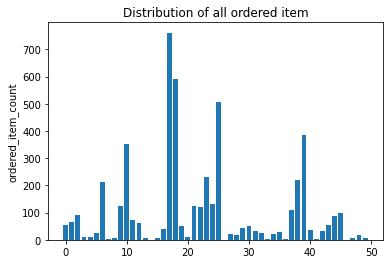

In [23]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist() # tolist()메서드는 순수 파이썬의 list 형태로 변환시켜줌
x_pos = np.arange(len(item_name_list)) # x_pos 인덱별 메뉴를 번호로 표현한것
order_cnt = item_quantity.values.tolist() # list(item_quantity.values) 동일한 결과를 불러옴. 즉, value값을 리스트로 반환해줌.

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

# 여기서 주의해야 할 것은 x축의 번호는 메뉴를 의미합니다.

## <Step3. 데이터 전처리> : 나만의 조력자를 정의하자

apply와 lambda 함수를 이용한 데이터 전처리

In [24]:
print(chipo.info())
print('====================================================')
print(chipo['item_price'].head()) # $ 특수문자로 인해서 산술적 표현을 할수 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int32 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int32(1), int64(1), object(3)
memory usage: 162.6+ KB
None
0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object


In [25]:
chipo['item_price'].apply(lambda x: float(x[1:])) # float(x[1:]) 예. $23.23/ 0번째는 무시하고 1번째 인덱스부터 읽어서 float 데이터 타입으로 변형하겠다는 말

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [26]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [27]:
chipo.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [28]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


## <Step4. 탐색적 분석> 스무고개로 분석하는 개념적 탐색

데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기

- 주문당 평균 계산금액 출력하기
- 한 주문에 10달러 이상 사용한 주문의 id들 출력하기 
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
- 'Veggie Salad Bowl'이 몇 번 주문되었는지 구하기
- 'Chicken Bowl'을 2개 이상 주문한 주문 회수 구하기

### 주문당 평균 계산 금액 출력하기

1. groupby함수 이해
2. 내가 원하는 column을 선택함.
3. groupby함수로 만들어진 객체에 적용 가능한 함수(집계 함수)에 대한 이해
4. 처음 제시된 사항에 대한 이해를 바탕으로 주문당 평균금액을 구하는 산술적 능력

In [29]:
chipo.groupby('order_id')

In [30]:
chipo.groupby('order_id')['item_price']

In [31]:
chipo.groupby('order_id')['item_price'].sum() # 각 주문('order_id')당 items들의 합계

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [32]:
chipo.groupby('order_id')['item_price'].sum().mean() # 각 주문당 가격 총합/총 주문 건수 = 주문당 평균 가격

18.811428571428568

In [33]:
chipo.groupby('order_id')['item_price'].sum().describe()

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

## 한 주문에 10달러 이상 사용한 주문의 id들 출력하기 

In [34]:
chipo.dtypes

order_id                int32
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [35]:
chipo.groupby('order_id') # groupby 객체를 만듬. 1번 주문, 2번 주문, 3번 주문 ... 에 해당하는 열을 기준으로 index를 만드는 거임/ 

In [37]:
chipo.groupby('order_id') #주문당 돈 얼마 썻는지 확인하기 위함

In [38]:
chipo_orderid_group = chipo.groupby('order_id').sum() # 각 주문당 합계 금액(예. 1번 주문 콜라1, 사이다1, 햄버거2개, 피자1개)  인덱스별 합계를 구하는 거임. DataFrame 리턴됨

In [39]:
chipo_orderid_group # 데이터프레임으로 리턴됨

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [40]:
chipo_orderid_group.item_price >= 10 # 1834건의 주문중에서 10달러 이상인 것들은 True 아니면 False로 반환시킴. bool list인 Series로 반환됨

order_id
1       True
2       True
3       True
4       True
5       True
        ... 
1830    True
1831    True
1832    True
1833    True
1834    True
Name: item_price, Length: 1834, dtype: bool

In [41]:
chipo_orderid_group[chipo_orderid_group.item_price >= 10]

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [42]:
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
6                2       17.50
7                2       15.70
8                2       10.88
9                3       10.67
10               2       13.20


In [43]:
print(results.index.values)

[   1    2    3 ... 1832 1833 1834]


## 각 아이템의 가격 구하기


In [44]:
(chipo.quantity == 1)

0        True
1        True
2        True
3        True
4       False
        ...  
4617     True
4618     True
4619     True
4620     True
4621     True
Name: quantity, Length: 4622, dtype: bool

In [45]:
chipo[chipo.quantity == 1] # 267개 아이템은 주문되지 않았다는 말. 아래 df는 수량 1개에 대한 표를 나타냄

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [56]:
chipo_one_item = chipo[chipo.quantity == 1]

In [52]:
chipo_one_item.groupby('item_name').min()
price_per_item = chipo_one_item.groupby('item_name').min()


In [64]:
# price_per_item.sort_values(by='item_price', ascending=False).iloc[:11] # sorting을 item_price 피처를 기준으로 내림차순으로 정렬하게됨
price_per_item.sort_values(by='item_price', ascending=False)[:10] # 위에것과 결과는 동일하지만 조회 방법이 iloc, loc 사용 유무에 있음


,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


## 아이템 가격 분포 그래프를 출력합니다.


In [80]:
price_per_item

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,129,1,[Coke],6.49
Barbacoa Bowl,19,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,11,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,75,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,17,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40


In [77]:
price_per_item.index # pandas index형태로 환합니다. 총 개수를 알고 싶다면? len()함수를 사용하면 되요.
price_per_item.index.tolist()       # 파이썬 리스트 형태로 바꾸어 주네요.


['6 Pack Soft Drink',
 'Barbacoa Bowl',
 'Barbacoa Burrito',
 'Barbacoa Crispy Tacos',
 'Barbacoa Salad Bowl',
 'Barbacoa Soft Tacos',
 'Bottled Water',
 'Bowl',
 'Burrito',
 'Canned Soda',
 'Canned Soft Drink',
 'Carnitas Bowl',
 'Carnitas Burrito',
 'Carnitas Crispy Tacos',
 'Carnitas Salad',
 'Carnitas Salad Bowl',
 'Carnitas Soft Tacos',
 'Chicken Bowl',
 'Chicken Burrito',
 'Chicken Crispy Tacos',
 'Chicken Salad',
 'Chicken Salad Bowl',
 'Chicken Soft Tacos',
 'Chips',
 'Chips and Fresh Tomato Salsa',
 'Chips and Guacamole',
 'Chips and Mild Fresh Tomato Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Tomatillo Green Chili Salsa',
 'Chips and Tomatillo Red Chili Salsa',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chips and Tomatillo-Red Chili Salsa',
 'Crispy Tacos',
 'Izze',
 'Nantucket Nectar',
 'Salad',
 'Side of Chips',
 'Steak Bowl',
 'Steak Burrito',
 'Steak Crispy Tacos',
 'Steak Salad',
 'Steak Salad Bowl',
 'Steak Soft Ta

In [79]:
x_pos = np.arange(len(item_name_list))    # len() 안의 리스트 변수의 개수는 50개니 0~49개의 리스트 요소들이 가각 만들어 질거에요.
# 즉, x축을 만들려고 할떄 그 기준을 아이템 이름으로 잡으면 좋지만 그럼 표가 분석하기 쉽지 않아 이름 대신 아이템 이름 하나하나를 숫자로 대신 표현함.

In [86]:
price_per_item['item_price'].tolist()  # value값을 리스트로 반환해줌

item_price = price_per_item['item_price'].tolist()


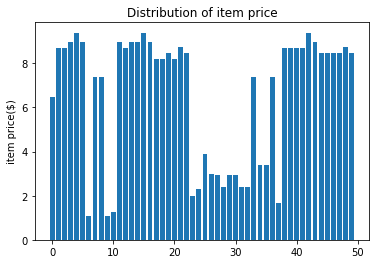

In [87]:
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')

plt.show()

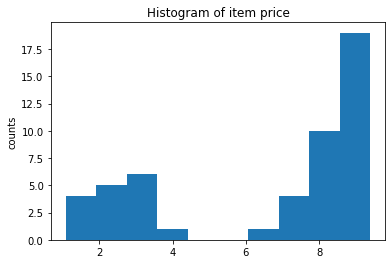

In [88]:
# 아이템 가격을 히스토그램으로 출력합니다. 
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

In [12]:
chipo['item_name']

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

In [13]:
chipo['item_name'] == 'Veggie Salad Bowl'

0       False
1       False
2       False
3       False
4       False
        ...  
4617    False
4618    False
4619    False
4620    False
4621    False
Name: item_name, Length: 4622, dtype: bool

In [16]:
# Veggie Salad Bowl'이 몇번 주문 되었는지 계산
chipo_salad = chipo[chipo['item_name'] == 'Veggie Salad Bowl']

In [17]:
chipo_salad.drop_duplicates(['item_name','order_id'])
# drop_duplicates 함수는 한 주문내에서 중복 집계된 item_names를 제거합니다. keep=first하고 나머지 중복은 버림

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",$11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",$8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75


In [18]:
len(chipo_salad)

18

In [19]:
chipo_salad

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",$11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",$8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$8.75
